In [1]:
!pip install cirq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 KB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.6/594.6 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.5/221.5 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.4/147.4 KB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn import datasets
import cirq
import itertools
from scipy.linalg import expm
from cirq import S, X, H, SWAP, ry
from cirq import Moment, Circuit, LineQubit, Simulator, measure
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
x = iris.data[:, :4] 
y = iris.target
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

### Visualization

In [12]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
x_min,x_max
y_min,y_max

(1.5, 4.9)

([], <a list of 0 Text major ticklabel objects>)

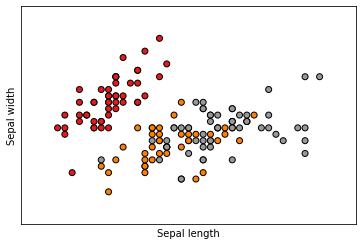

In [13]:
# Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


In [16]:
pca = PCA(n_components=2) # n_components can be anything <= original number of dimensions
pcaFeats = pca.fit_transform(x)
pca.explained_variance_

array([4.22824171, 0.24267075])

In [19]:
dfP =  pd.DataFrame(pcaFeats)
dfP = dfP.assign(target=y)

In [23]:
px.scatter(dfP, x = 0, y=1, color="target")

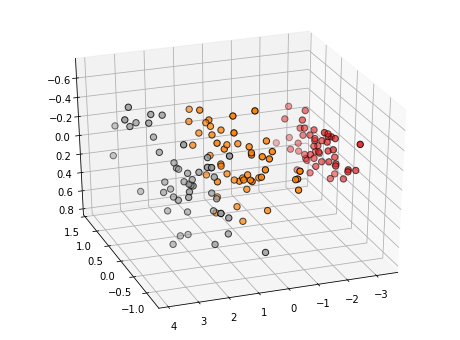

In [24]:
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

## Quantum SVC


In [25]:
class eF(cirq.Gate):
    """The eF gate to be used in the HHL portion of the QSVM algorithm.
    Args:
        F (2x2 Matrix): The F matrix generated from the kernel.
        coefficient (number): The coefficient to apply in the exponent.
    Attributes:
        F (2x2 Matrix): The F matrix generated from the kernel.
        coefficient (number): The coefficient to apply in the exponent.
    """
    def __init__(self, F, coefficient):
        """Invoke the super function to initialize the object based on the parent (Gate) and set the attributes."""
        super(eF, self)
        self.F = F
        self.coefficient = coefficient

    def _num_qubits_(self):
        """Single qubit gate."""
        return 1

    def _unitary_(self):
        """Unitary matrix for e^(CiFt0) (2x2)."""
        return expm(self.coefficient * 1j * self.F * 2 * np.pi)

    def _circuit_diagram_info_(self, args):
        """Diagram symbol: e^(CiFt0)"""
        return f'e^({self.coefficient}iFt0)'

class SDagger(cirq.Gate):
    """The S conjugate gate."""
    def __init__(self):
        """Invoke the super function to initialize the object based on the parent (Gate)."""
        super(SDagger, self)

    def _num_qubits_(self):
        """Single qubit gate."""
        return 1

    def _unitary_(self):
        """Unitary matrix for S conjugate (2x2)."""
        return np.array([[1,   0],
                         [0, -1j]])

    def _circuit_diagram_info_(self, args):
        """Diagram symbol: S✝"""
        return 'S✝'

class I(cirq.Gate):
    """The identity (I) gate."""
    def __init__(self):
        """Invoke the super function to initialize the object based on the parent (Gate)."""
        super(I, self)

    def _num_qubits_(self):
        """Single qubit gate."""
        return 1

    def _unitary_(self):
        """Unitary identity matrix (2x2)."""
        return np.array([[1, 0],
                         [0, 1]])

    def _circuit_diagram_info_(self, args):
        """Diagram symbol: I"""
        return 'I'

In [26]:
def l2_normalization(lin_map_matrix):
    """Applies L2 Normalization to the datapoints in the dataset.
    L2 normalization is defined as sqrt(sum(x0**2 + x1**2)), where x0 and x1 are the
    two x values in each datapoint. This is applied for each datapoint (row) in the dataset.
    Args:
        lin_map_matrix: The x values of the train or test dataset with only 2 features.
    Returns:
        The L2 normalized datapoints.
    """
    # Find the L2 normalization term for each row
    normalization = np.sqrt(np.sum(lin_map_matrix ** 2, axis=1))[np.newaxis].T
    # Divide the points by the normalization term
    lin_map_matrix = lin_map_matrix / normalization
    return lin_map_matrix

In [27]:
def linear_mapping(data_matrix, ms, bs):
    """Linearly maps (scales) the dataset.
    This method assumes that the dataset only has two features, and the ms and bs
    arrays also only have two values each. Any additional values will be ignored.
    The first index of each datapoint is multiplied by the first value in ms
    and the first value in bs is added. The second index of each datapoint is
    multiplied by the second value in ms and the second value of bs is added.
    This has the effect of making the theta values, which are calculated later,
    more spread out within the first quadrant and also ensures that there are
    not erronious theta values outside of the first quadrant.
    Args:
        data_matrix: The x values of the train or test dataset with only 2 features.
        ms: The m values for each of the two features. Should be a list of length 2.
        bs: The b values for each of the two features. Should be a list of length 2.
    Returns:
        The linearly mapped datapoints.
    """
    # Linearly map the hr and vr values
    data_matrix[:, 0] = data_matrix[:, 0] * ms[0] + bs[0]
    data_matrix[:, 1] = data_matrix[:, 1] * ms[1] + bs[1]
    return data_matrix

In [28]:
def reduce_features(x, i1, i2):
    """Reduces the number of features in X down to 2.
    Args:
        x: The x values of the train or test dataset.
        i1: The index of the first feature to utilize.
        i2: The index of the second feature to utilize.
    Returns:
        An Nx2 matrix, where N is the length of the dataset and 2 is the two input features.
    """
    # Reduce the features to the given feature indices
    return x[:, [i1, i2]]

In [29]:
def generate_angles(normalized_matrix):
    """Generates the angles (thetas) for each datapoint in the dataset.
    This reduces each datapoint from two values down to one. The angle, theta, is
    derived from the value (x0 / x1). The value has either the arctan or arccot
    function applied, depending on its quadrant of the graph. For the first and
    second quandrant the arccot is taken. For the third and fourth quadrant the
    arctan is taken. Also, the arccot is not a numpy function, but the value is
    derived by taking the arctan(1/(x0 / x1)), which is equivalent.
    Args:
        normalized_matrix: The normalized x values from either the train or test datasets.
    Returns:
        The theta matrix for the dataset (Nx1); one theta for each datapoint.
    """
    # Divide the x0 values by the x1 values
    x1_over_x2 = normalized_matrix[:, 0] / normalized_matrix[:, 1]

    # { (x0, x1) in first quandrant take arccot(x0/x1)
    # { (x0, x1) in second quandrant take arccot(x0/x1)
    # { (x0, x1) in third quandrant take arctan(x0/x1)
    # { (x0, x1) in fourth quandrant take arctan(x0/x1)
    thetas = np.zeros(x1_over_x2.shape)
    thetas[normalized_matrix[:, 1] >= 0] = np.arctan(1 / x1_over_x2[normalized_matrix[:, 1] >= 0])
    thetas[normalized_matrix[:, 1] < 0] = np.arctan(x1_over_x2[normalized_matrix[:, 1] < 0])

    return thetas

In [30]:
def preprocess_data(x):
  # Reduce the x values down to 2 features
  x_reduced = reduce_features(x, 0, 1)
# Linearly map the data to better align it for the kernels
  linear_mapped = linear_mapping(x_reduced, [1.2, 1.8], [-.8, -1.2])
# Normalize the data
  normalized = l2_normalization(linear_mapped)
# Get the thetas from the normalized data
  thetas = generate_angles(normalized)
  return thetas,normalized

In [64]:
def build_kernel(thetas_train):
    """Creates and runs the quantum kernel generation circuit with the modified implementation.
    The modified implementation of the kernel generation removes the control from the rotation
    gates and instead uses M qubits, each of which is put through a single rotation gate. Each
    rotation gate is mapped to a single train theta. This has the effect of increasing the
    number of qubits for the system but decreasing the number of gates, as the added control
    would require many more additional gates in an actual implementation.
    After the final state vector is obtained, it is used to calculate the kernel matrix K.
    This kernel matrix is then returned. The formula for the kernel matrix is as follows:
    1. Ktop = K / tr(K) = trB(|ψ><ψ|)
    2. K = Ktop * tr(K)
    NOTE: Since the train values were normalized, tr(K) = 2.
    Args:
        M: The number of training points to be used.
        theta_train: The list of training thetas for use in the circuit.
        verbose: A parameter to determine what information is printed. Either 0, 1, or 2.
    Returns:
        A kernel matrix, of size 2x2.
    """
    # Circuit
    c = Circuit()
    print()
    M=3
    # Set M Qubits
    qubits = []
    for i in range(1, M+1):
        qubits.append(LineQubit(i))

    # Set M Rotations w/ Each Training Theta
    for i in range(M):
        c.append(ry(2*thetas_train[i]).on(qubits[i]))

    # Print the circuit if desired
    print(c)
        

    # Create the simulator
    s = Simulator()

    # Get the simulated results and final state vector
    results = s.simulate(c)
    state = results.final_state_vector.real

    # Get the outer product of the state vector with itself
    state_outer_norm = np.outer(state, state)

    # Set a value to half the length/width of the outer product and use it to find the partial trace TrB
    half = state_outer_norm.shape[0] // 2
    Ktop = np.array([[np.trace(state_outer_norm[:half, :half]), np.trace(state_outer_norm[:half, half:])],
                    [np.trace(state_outer_norm[half:, :half]), np.trace(state_outer_norm[half:, half:])]])

    # If desired print the intermediary matrix values
    print('\n')
    print('Final State Vector:', state)
    print('Normalized Outer Product:', state_outer_norm)
    print('K-top [K/tr(K)]:', Ktop)
      
    
    # Generate K from the Ktop value, which is the partial trace of the outer product of the state vector
    K = Ktop * 2
    
    print('K:', K)
      

    return K

The Harrow-Hassidim-Lloyd (HHL) algorithm is a method to solve the quantum linear system of equations that may be found at the core of various scientific applications and quantum machine learning models including the linear regression, support vector machines and recommender systems etc.

In [78]:
# def qsvm_circuit(F, theta0, theta1, theta2):
#     """Creates and runs the QSVM circuit for two given train values and one test value.
#     After the thetas are ran through the QSVM circuit, the resulting state vector
#     is used to determine the prediction value [1/-1] for the given test theta.
#     First an expectation matrix (O) is created, then used with the inner product
#     of the state vector with itself. The sign of the resulting value is what is
#     used for the prediction. The formula for these steps is denoted as follows:
#     1. O = |000><000| ⊗ |1><0|
#     2. E = <ψ|O|ψ>
#     3. P = sign(E)
#     Args:
#         F: The matrix used to generate the unitary operator e^(iFt0).
#         theta0: The test theta, for which a prediction will be determined.
#         theta1: The first train theta.
#         theta2: The second train theta.
#         r: A term used to adjust the controlled rotation during the HHL portion.
#         verbose: A parameter to determine what information is printed. Either 0, 1, or 2.
#    Returns:
#         A prediction for the given test theta, either 1 or -1.
#     """
#     # Circuit
#     c = Circuit()

#     # Set 4 Qubits
#     q1 = LineQubit(1)
#     q2 = LineQubit(2)
#     q3 = LineQubit(3)
#     q4 = LineQubit(4)

#     # Setup Non-Zero States
#     c.append(Moment([X(q3)]))
#     c.append(Moment([H(q3)]))

#     # Phase Estimation with Matrix F Derived from K
#     c.append(Moment([H(q1), H(q2)]))
#     c.append(Moment([eF(F, 2).on(q3).controlled_by(q1)]))
#     c.append(Moment([eF(F, 1).on(q3).controlled_by(q1)]))
#     c.append(Moment([SWAP(q1, q2)]))
#     c.append(Moment([H(q2)]))
#     c.append(Moment([SDagger().on(q1).controlled_by(q2)]))
#     c.append(Moment([H(q1)]))

#     # Controlled Rotation
#     c.append(Moment([X(q1)]))
#     c.append(Moment([ry(2*np.pi/(16)).on(q4).controlled_by(q1)]))
#     c.append(Moment([ry(np.pi/(16)).on(q4).controlled_by(q2)]))
#     c.append(Moment([X(q1)]))

#     # Inverse Phase Estimation
#     c.append(Moment([H(q1)]))
#     c.append(Moment([S(q1).controlled_by(q2)]))
#     c.append(Moment([H(q2)]))
#     c.append(Moment([SWAP(q1, q2)]))
#     c.append(Moment([eF(F, -1).on(q3).controlled_by(q1)]))
#     c.append(Moment([eF(F, -2).on(q3).controlled_by(q1)]))
#     c.append(Moment([H(q1), H(q2)]))

#     # Training Oracle
#     c.append(Moment([X(q3)]))
#     c.append(Moment([ry(2*theta1).on(q2).controlled_by(q3, q4)]))
#     c.append(Moment([X(q3)]))
#     c.append(Moment([ry(2*theta2).on(q2).controlled_by(q3, q4)]))

#     # Test Oracle
#     c.append(Moment([ry(-2*theta0).on(q2).controlled_by(q4)]))
#     c.append(Moment([H(q3).controlled_by(q4)]))

#     print('\n')
#     print(c)
#     print()   
#     print('\n')

#     # Create the simulator
#     s = Simulator()

#     # Get the simulated results and final state vector
#     results = s.simulate(c)
#     state = results.final_state_vector.real

#     # O = |000><000| ⊗ |1><0|
#     O = np.zeros((16, 16)); O[1][0] = 1

#     # E = <ψ|O|ψ>
#     E = np.inner(np.matmul(state.conj().T, O), state)

#     # Prediction = sign(E)
#     prediction = int(np.sign(E).real)
#     if prediction == 0: prediction = 1

#     return prediction


In [91]:
def qsvm_circuit(F, theta0, theta1, theta2, r=4, verbose=0):
    """Creates and runs the QSVM circuit for two given train values and one test value.
    After the thetas are ran through the QSVM circuit, the resulting state vector
    is used to determine the prediction value [1/-1] for the given test theta.
    First an expectation matrix (O) is created, then used with the inner product
    of the state vector with itself. The sign of the resulting value is what is
    used for the prediction. The formula for these steps is denoted as follows:
    1. O = |000><000| ⊗ |1><0|
    2. E = <ψ|O|ψ>
    3. P = sign(E)
    Args:
        F: The matrix used to generate the unitary operator e^(iFt0).
        theta0: The test theta, for which a prediction will be determined.
        theta1: The first train theta.
        theta2: The second train theta.
        r: A term used to adjust the controlled rotation during the HHL portion.
        verbose: A parameter to determine what information is printed. Either 0, 1, or 2.
    Returns:
        A prediction for the given test theta, either 1 or -1.
    """
    # Circuit
    c = Circuit()

    # Set 4 Qubits
    q1 = LineQubit(1)
    q2 = LineQubit(2)
    q3 = LineQubit(3)
    q4 = LineQubit(4)

    # Setup Non-Zero States
    c.append(Moment([X(q3)]))
    c.append(Moment([H(q3)]))

    # Phase Estimation with Matrix F Derived from K
    c.append(Moment([H(q1), H(q2)]))
    c.append(Moment([eF(F, 2).on(q3).controlled_by(q1)]))
    c.append(Moment([eF(F, 1).on(q3).controlled_by(q1)]))
    c.append(Moment([SWAP(q1, q2)]))
    c.append(Moment([H(q2)]))
    c.append(Moment([SDagger().on(q1).controlled_by(q2)]))
    c.append(Moment([H(q1)]))

    # Controlled Rotation
    c.append(Moment([X(q1)]))
    c.append(Moment([ry(2*np.pi/(2 ** r)).on(q4).controlled_by(q1)]))
    c.append(Moment([ry(np.pi/(2 ** r)).on(q4).controlled_by(q2)]))
    c.append(Moment([X(q1)]))

    # Inverse Phase Estimation
    c.append(Moment([H(q1)]))
    c.append(Moment([S(q1).controlled_by(q2)]))
    c.append(Moment([H(q2)]))
    c.append(Moment([SWAP(q1, q2)]))
    c.append(Moment([eF(F, -1).on(q3).controlled_by(q1)]))
    c.append(Moment([eF(F, -2).on(q3).controlled_by(q1)]))
    c.append(Moment([H(q1), H(q2)]))

    # Training Oracle
    c.append(Moment([X(q3)]))
    c.append(Moment([ry(2*theta1).on(q2).controlled_by(q3, q4)]))
    c.append(Moment([X(q3)]))
    c.append(Moment([ry(2*theta2).on(q2).controlled_by(q3, q4)]))

    # Test Oracle
    c.append(Moment([ry(-2*theta0).on(q2).controlled_by(q4)]))
    c.append(Moment([H(q3).controlled_by(q4)]))

    # Print the circuit if desired
    
    print()
    print(c)
    print()


    # Create the simulator
    s = Simulator()

    # Get the simulated results and final state vector
    results = s.simulate(c)
    state = results.final_state_vector.real

    # O = |000><000| ⊗ |1><0|
    O = np.zeros((16, 16)); O[1][0] = 1

    # E = <ψ|O|ψ>
    E = np.inner(np.matmul(state.conj().T, O), state)

    # Prediction = sign(E)
    prediction = int(np.sign(E).real)
    if prediction == 0: prediction = 1

    return prediction

### Class 0 vs all others

In order to classify the three classes(setosa, versicolor, virginica) using the one-vs-all format, I'm here taking class 0 vs all other in the first place.
So if ytrain[i]==0, I'm making it as 1 else -1. Similarly with ytest.

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
xtrain
xtest
ytrain
ytest

array([0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 2, 2, 1, 2])

In [93]:

for i in range(len(ytrain)):
  if ytrain[i]>0:
    ytrain[i]=-1
  else:
    ytrain[i]=1
for i in range(len(ytest)):
  if ytest[i]>0:
    ytest[i]=-1
  else:
    ytest[i]=1

In [94]:
ytrain
ytest

array([ 1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1])

In [95]:
# Preprocess the train and test data, both thetas and normalized
thetas_train, normalized_train = preprocess_data(xtrain)
thetas_test, normalized_test = preprocess_data(xtest)


In [96]:
K_simplified = build_kernel(thetas_train)



1: ───Ry(0.479π)───

2: ───Ry(0.311π)───

3: ───Ry(0.375π)───


Final State Vector: [0.5353749  0.35805324 0.284807   0.190476   0.50191396 0.3356749
 0.26700655 0.17857125]
Normalized Outer Product: [[0.28662625 0.19169271 0.15247852 0.10197607 0.26871213 0.17971191
  0.1429486  0.09560256]
 [0.19169271 0.12820213 0.10197607 0.06820055 0.17971192 0.12018949
  0.09560256 0.06393801]
 [0.15247852 0.10197607 0.08111502 0.0542489  0.14294861 0.09560256
  0.07604533 0.05085834]
 [0.10197607 0.06820055 0.0542489  0.03628111 0.09560256 0.06393801
  0.05085834 0.03401354]
 [0.26871213 0.17971192 0.14294861 0.09560256 0.25191763 0.16847992
  0.13401431 0.08962741]
 [0.17971191 0.12018949 0.09560256 0.06393801 0.16847992 0.11267765
  0.0896274  0.05994189]
 [0.1429486  0.09560256 0.07604533 0.05085834 0.13401431 0.0896274
  0.0712925  0.04767969]
 [0.09560256 0.06393801 0.05085834 0.03401354 0.08962741 0.05994189
  0.04767969 0.03188769]]
K-top [K/tr(K)]: [[0.5322245  0.4989605 ]
 [0.4989605  

In [97]:
y_predtest=[]
for i in range(len(ytest)):
  print("Test Case:",i)
  y_predtest.append(qsvm_circuit(K_simplified, thetas_test[i], thetas_train[0], thetas_train[1]))
y_predtest=np.array(y_predtest)
print("Predicted Test values")
y_predtest


Test Case: 0

1: ───────────H───@───────────@───────────×───────S✝───H───X───@─────────────────────────X───H───@───────────×───@────────────@────────────H───────────────────────────────────────────────────────
                  │           │           │       │            │                                 │           │   │            │
2: ───────────H───┼───────────┼───────────×───H───@────────────┼────────────@────────────────────@^0.5───H───×───┼────────────┼────────────H───────Ry(0.479π)───────Ry(0.311π)───Ry(-0.447π)───────
                  │           │                                │            │                                    │            │                    │                │            │
3: ───X───H───────e^(2iFt0)───e^(1iFt0)────────────────────────┼────────────┼────────────────────────────────────e^(-1iFt0)───e^(-2iFt0)───────X───@────────────X───@────────────┼─────────────H───
                                                               │            │              

array([ 1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1])

In [98]:
print(ytest)
print(y_predtest)
print(accuracy_score(ytest,y_predtest)*100)

[ 1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1]
[ 1  1 -1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1  1]
93.33333333333333


### Class 1 vs all other


In order to classify the three classes(setosa, versicolor, virginica) using the one-vs-all format, I'm here taking class 1 vs all other in the first place. So if ytrain[i]==1, I'm making it as 1 else -1. Similarly with ytest.

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
xtrain
xtest
ytrain
ytest

array([1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1,
       2, 0, 1, 0, 2, 2, 1, 2])

In [111]:
for i in range(len(ytrain)):
  if ytrain[i]==1:
    ytrain[i]=1
  else:
    ytrain[i]=-1
for i in range(len(ytest)):
  if ytest[i]==1:
    ytest[i]=1
  else:
    ytest[i]=-1

In [112]:
ytrain
ytest

array([ 1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1])

In [113]:
# Preprocess the train and test data, both thetas and normalized
thetas_train, normalized_train = preprocess_data(xtrain)
thetas_test, normalized_test = preprocess_data(xtest)

In [127]:
K_simplified1 = build_kernel( thetas_train)


1: ───Ry(0.294π)───

2: ───Ry(0.361π)───

3: ───Ry(0.373π)───


Final State Vector: [0.6297502  0.41739258 0.40037096 0.26536214 0.3133828  0.20770721
 0.19923674 0.13205226]
Normalized Outer Product: [[0.39658532 0.26285306 0.2521337  0.16711186 0.19735289 0.13080366
  0.12546937 0.08315993]
 [0.26285306 0.17421657 0.16711187 0.11076019 0.13080366 0.08669545
  0.08315994 0.05511763]
 [0.2521337  0.16711187 0.1602969  0.1062433  0.12546937 0.08315993
  0.07976861 0.05286989]
 [0.16711186 0.11076019 0.1062433  0.07041707 0.08315993 0.05511763
  0.05286989 0.03504167]
 [0.19735289 0.13080366 0.12546937 0.08315993 0.09820879 0.06509187
  0.06243737 0.04138291]
 [0.13080366 0.08669545 0.08315993 0.05511763 0.06509187 0.04314229
  0.04138291 0.02742821]
 [0.12546937 0.08315994 0.07976861 0.05286989 0.06243737 0.04138291
  0.03969528 0.02630966]
 [0.08315993 0.05511763 0.05286989 0.03504167 0.04138291 0.02742821
  0.02630966 0.0174378 ]]
K-top [K/tr(K)]: [[0.8015158  0.39885858]
 [0.3988585

In [128]:
y_predtest=[]
for i in range(len(ytest)):
  print("Testcase:",i)
  y_predtest.append(qsvm_circuit(K_simplified1, thetas_test[i], thetas_train[0], thetas_train[1])) 
y_predtest=np.array(y_predtest)
y_predtest

Testcase: 0

1: ───────────H───@───────────@───────────×───────S✝───H───X───@─────────────────────────X───H───@───────────×───@────────────@────────────H───────────────────────────────────────────────────────
                  │           │           │       │            │                                 │           │   │            │
2: ───────────H───┼───────────┼───────────×───H───@────────────┼────────────@────────────────────@^0.5───H───×───┼────────────┼────────────H───────Ry(0.294π)───────Ry(0.361π)───Ry(-0.361π)───────
                  │           │                                │            │                                    │            │                    │                │            │
3: ───X───H───────e^(2iFt0)───e^(1iFt0)────────────────────────┼────────────┼────────────────────────────────────e^(-1iFt0)───e^(-2iFt0)───────X───@────────────X───@────────────┼─────────────H───
                                                               │            │               

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1])

In [130]:
print(ytest)
print(y_predtest)
print(accuracy_score(ytest,y_predtest)*100)

[-1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1
  1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1  1]
76.66666666666667


### Class 2 vs all other

In [161]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
xtrain
xtest
ytrain
ytest

array([1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 0, 0])

In [162]:
for i in range(len(ytrain)):
  if ytrain[i]==2:
    ytrain[i]=1
  else:
    ytrain[i]=-1
for i in range(len(ytest)):
  if ytest[i]==2:
    ytest[i]=1
  else:
    ytest[i]=-1

In [163]:
ytrain
ytest

array([-1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1])

In [164]:
# Preprocess the train and test data, both thetas and normalized
thetas_train, normalized_train = preprocess_data(xtrain)
thetas_test, normalized_test = preprocess_data(xtest)

In [165]:
K_simplified2 = build_kernel( thetas_train)


1: ───Ry(0.353π)───

2: ───Ry(0.362π)───

3: ───Ry(0.367π)───


Final State Vector: [0.60046285 0.39006445 0.38377407 0.24930206 0.37246758 0.24195728
 0.23805536 0.15464225]
Normalized Outer Product: [[0.36055565 0.23421921 0.23044208 0.14969663 0.22365294 0.14528635
  0.1429434  0.09285693]
 [0.23421921 0.15215027 0.14969662 0.09724387 0.14528637 0.09437893
  0.09285694 0.06032044]
 [0.23044208 0.14969662 0.14728254 0.09567567 0.1429434  0.09285693
  0.09135947 0.05934769]
 [0.14969663 0.09724387 0.09567567 0.06215152 0.09285694 0.06032045
  0.05934769 0.03855263]
 [0.22365294 0.14528637 0.1429434  0.09285694 0.13873209 0.09012124
  0.08866791 0.05759922]
 [0.14528635 0.09437893 0.09285693 0.06032045 0.09012124 0.05854332
  0.05759923 0.03741682]
 [0.1429434  0.09285694 0.09135947 0.05934769 0.08866791 0.05759923
  0.05667036 0.03681342]
 [0.09285693 0.06032044 0.05934769 0.03855263 0.05759922 0.03741682
  0.03681342 0.02391423]]
K-top [K/tr(K)]: [[0.72213995 0.447944  ]
 [0.447944 

In [166]:
y_predtest=[]
for i in range(len(ytest)):
  print("Testcase:",i)
  y_predtest.append(qsvm_circuit(K_simplified2, thetas_test[i], thetas_train[0], thetas_train[1]))
y_predtest=np.array(y_predtest)
y_predtest


Testcase: 0

1: ───────────H───@───────────@───────────×───────S✝───H───X───@─────────────────────────X───H───@───────────×───@────────────@────────────H───────────────────────────────────────────────────────
                  │           │           │       │            │                                 │           │   │            │
2: ───────────H───┼───────────┼───────────×───H───@────────────┼────────────@────────────────────@^0.5───H───×───┼────────────┼────────────H───────Ry(0.353π)───────Ry(0.362π)───Ry(-0.329π)───────
                  │           │                                │            │                                    │            │                    │                │            │
3: ───X───H───────e^(2iFt0)───e^(1iFt0)────────────────────────┼────────────┼────────────────────────────────────e^(-1iFt0)───e^(-2iFt0)───────X───@────────────X───@────────────┼─────────────H───
                                                               │            │               

array([ 1,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
        1,  1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1])

In [167]:
print(ytest)
print(y_predtest)
print(accuracy_score(ytest,y_predtest)*100)

[-1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1
 -1  1 -1 -1 -1 -1]
[ 1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1  1
 -1 -1  1 -1 -1 -1]
63.33333333333333


In conclusion, I can say predicting the class vs all other approach for QSVM yield the accuracy of 93.333
Since I've used the same one for all others, there is a decreasing accuracy affect on class 1 and class 2 classification.
Classified them seperately would again yield good accuracy.
In this code, I've used less number of  qubits and yet achieved good accuracy.